# Number Recognition

- Step : 1 - Import Datascience Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

> **Step - 1 : Loading Dataset**

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits() # which contain dataset
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

> **Step : 3 - Data Preprocessing**

> - Thresholding (Binarizing  (min and max))
- Normalsing (0 - 1)

* Extracting Independent and dependent varibles*

In [6]:
X = digits['data'] # images
y = digits['target'] # labeling of that image

In [7]:
X.shape, y.shape

((1797, 64), (1797,))

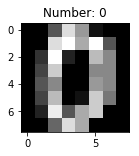

In [26]:
plt.figure(figsize=(2,2))
img = X[0:1]
plt.imshow(img.reshape((8,8)),cmap ='gray')
plt.title('Number: '+str(y[0]))
plt.show()

*Thresholding*
> Any values greater than 7 replace with max value and if less than 7 replace with min value

In [23]:
cond1 = X >= 7 # find values greater or equal to than 7
cond2 = X < 7 # find values less than 7
X_t = X.copy() # copy array as X_t
X_t[cond1] = X_t.max() # if cond1 statisfy replace with max
X_t[cond2] = X_t.min() # if cond2 statisfy replace with min

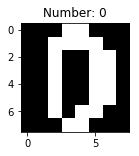

In [27]:
plt.figure(figsize=(2,2))
img = X_t[0:1]
plt.imshow(img.reshape((8,8)),cmap ='gray')
plt.title('Number: '+str(y[0]))
plt.show()

**Normalising**

In [29]:
X_t = X_t/ X_t.max() # Normalising (0 - 1)

> ** Step : 4 - Splitting data into training and testing**

In [30]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_t,y,test_size=0.2,
                                                   random_state=0)

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

> ** Step: 5 - Buliding Machine Learning model**
    - Logistic Regression, KNearestNeighbour, Support Vector Mahcine, Decision Tree, Random Forest
    

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
model_log = LogisticRegression(C = 10.0) # Creating LR model
model_knn = KNeighborsClassifier(n_neighbors=3) # KNN
model_svm = SVC(C=10.0,kernel='rbf') # SVM
model_dt = DecisionTreeClassifier() # Decision Tree
model_rf = RandomForestClassifier(n_estimators=100) # Random Forest

***Training Model***

In [37]:
model_log.fit(x_train,y_train) # fitting  Logistic model
model_knn.fit(x_train,y_train) # fitting KNN model
model_svm.fit(x_train,y_train) # fitting SVM model
model_dt.fit(x_train,y_train) # fitting DT model
model_rf.fit(x_train,y_train) # fitting RF model
print('Models Trained Sucessfully !!!')

Model Trained Sucessfully !!!


> ** Step : 6 - Model Evaluation**

- Confusion Matrix
- Classification Report

In [39]:
y_pred_log = model_log.predict(x_test) # predicted results
y_pred_knn = model_knn.predict(x_test) # predicted results
y_pred_svm = model_svm.predict(x_test) # predicted results
y_pred_dt = model_dt.predict(x_test) # predicted results
y_pred_rf = model_rf.predict(x_test) # predicted results

In [40]:
from sklearn.metrics import confusion_matrix , classification_report

In [41]:
cm_log = confusion_matrix(y_test,y_pred_log) # logistic regression
cm_knn = confusion_matrix(y_test,y_pred_knn) # knn
cm_svm = confusion_matrix(y_test,y_pred_svm) # svm
cm_dt = confusion_matrix(y_test,y_pred_dt) # decision tree
cm_rf = confusion_matrix(y_test,y_pred_rf) # random forest

In [42]:
import seaborn as sns

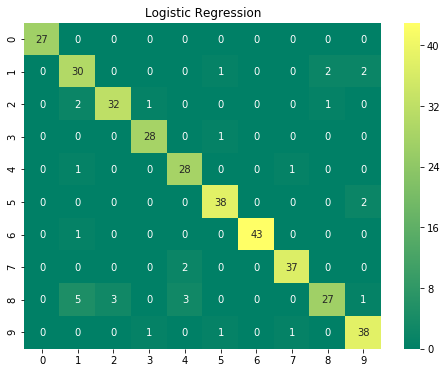

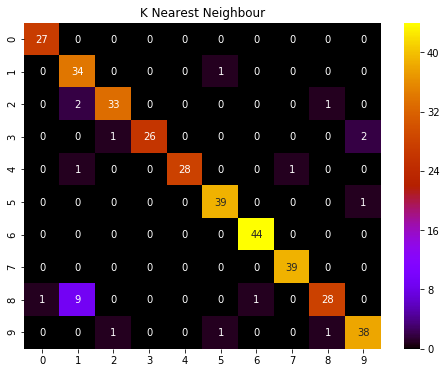

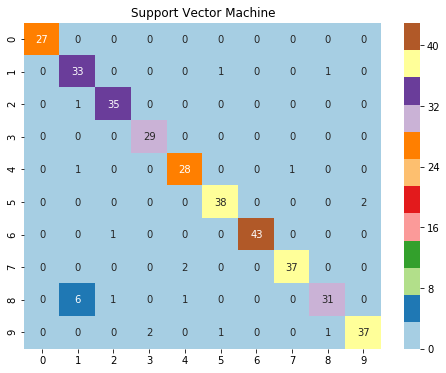

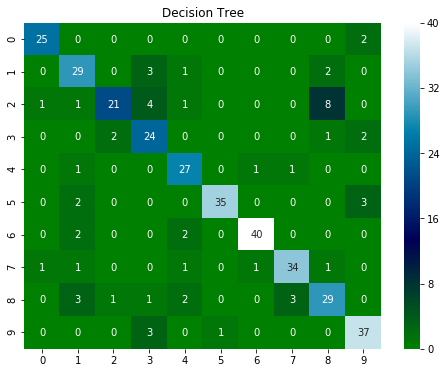

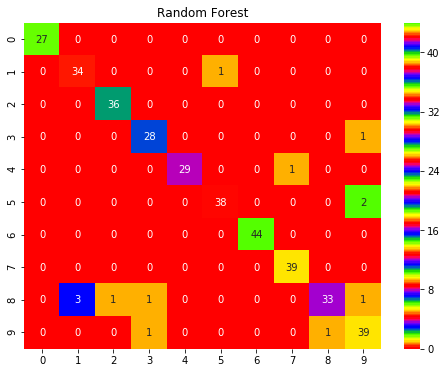

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_log,annot=True,cmap='summer')
plt.title('Logistic Regression')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(cm_knn,annot=True,cmap='gnuplot')
plt.title('K Nearest Neighbour')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(cm_svm,annot=True,cmap='Paired')
plt.title('Support Vector Machine')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(cm_dt,annot=True,cmap='ocean')
plt.title('Decision Tree')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(cm_rf,annot=True,cmap='prism')
plt.title('Random Forest')
plt.show()

In [49]:
cr_log = classification_report(y_test,y_pred_log)
print('\n'+'='*20+ 'Logistic Regression'+ "="*20+'\n')
print(cr_log)
cr_knn = classification_report(y_test,y_pred_knn)
print('\n'+'='*20+ 'K Nearest Neighbour'+ "="*20+'\n')
print(cr_knn)
cr_svm = classification_report(y_test,y_pred_svm)
print('\n'+'='*20+ 'Support Vector Machine'+ "="*20+'\n')
print(cr_svm)
cr_dt = classification_report(y_test,y_pred_dt)
print('\n'+'='*20+ 'Decision Tree'+ "="*20+'\n')
print(cr_dt)
cr_rf = classification_report(y_test,y_pred_rf)
print('\n'+'='*20+ 'Random Forest'+ "="*20+'\n')
print(cr_rf)


====================Logistic Regression====================

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.77      0.86      0.81        35
          2       0.91      0.89      0.90        36
          3       0.93      0.97      0.95        29
          4       0.85      0.93      0.89        30
          5       0.93      0.95      0.94        40
          6       1.00      0.98      0.99        44
          7       0.95      0.95      0.95        39
          8       0.90      0.69      0.78        39
          9       0.88      0.93      0.90        41

avg / total       0.91      0.91      0.91       360


====================K Nearest Neighbour====================

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        27
          1       0.74      0.97      0.84        35
          2       0.94      0.92      0.93        36
          3       1.00  

# Test your model

In [50]:
import cv2

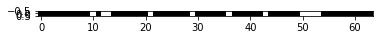

In [58]:
# step 1 : read and convert into gray scale
img = cv2.imread('number2.jpg',0)
# step 2 : Resize image to 8 x 8
img_re = cv2.resize(img,(8,8))
# step 3: inverse thresolding
ret, thresh = cv2.threshold(img_re,127,255,cv2.THRESH_BINARY_INV)
# step 4 : Noramlizing (0 - 1)
test = thresh/255.0
# step 5 : Reshaping (1,64)
test = test.reshape((1,64))
plt.imshow(test,cmap ='gray')
plt.show()

In [60]:
print('Prediction with Random forest: ',model_rf.predict(test))

Prediction with Random forest:  [2]


# Real Time 

In [63]:
cap = cv2.VideoCapture(0)

while True:
    _,img = cap.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7,7),3)
    _,th3 = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)
    #th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,21,7)
    im2, contours, hierarchy = cv2.findContours(th3,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    ix = np.where(np.array(areas) > 300)[0]
    result = np.array([1,0,0,0,0,0,0,0,0,0])
    for i in ix:
        cnt = contours[i]
        xr,yr,wr,hr = cv2.boundingRect(cnt)
        if xr< 20 :
            xr = 25


        if yr < 20:
            yr = 25


        cv2.rectangle(img,(xr-10,yr-10),(xr+wr+10,yr+hr+10), (0,255,0),2)
        roi = th3[yr-20:yr+hr+20, xr-20:xr+wr+20]
        
        roi_re=cv2.resize(roi,(8,8))
        g = roi_re.reshape(1,64).astype('float32')
        g = g/255
        result=  model_rf.predict(g)
        #print(result)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,'Number: '+str(result),(xr-10,yr-10), font, 0.4, (255,0,0), 1, cv2.LINE_AA)


    cv2.imshow('Threshold',th3)
    cv2.imshow('orginal',img)

    if cv2.waitKey(41) & 0xff == ord('q'):
        break
        
    
    
cap.release()    
cv2.destroyAllWindows()

"q" - to close